In [162]:
import numpy as np
import pandas as pd
from random import randint, seed as randseed
import seaborn as sns 
import matplotlib.pyplot as plt
from itertools import combinations
from wordcloud import WordCloud
import requests,urllib
import ijson,json

sns.set();

In [1]:
## Using the https://api.fda.gov/ we want to: 
## to analyze and to assess a drug’s potential correlation to liver injury. I couldn’t find any support based on my analysis of the FDA data until now.

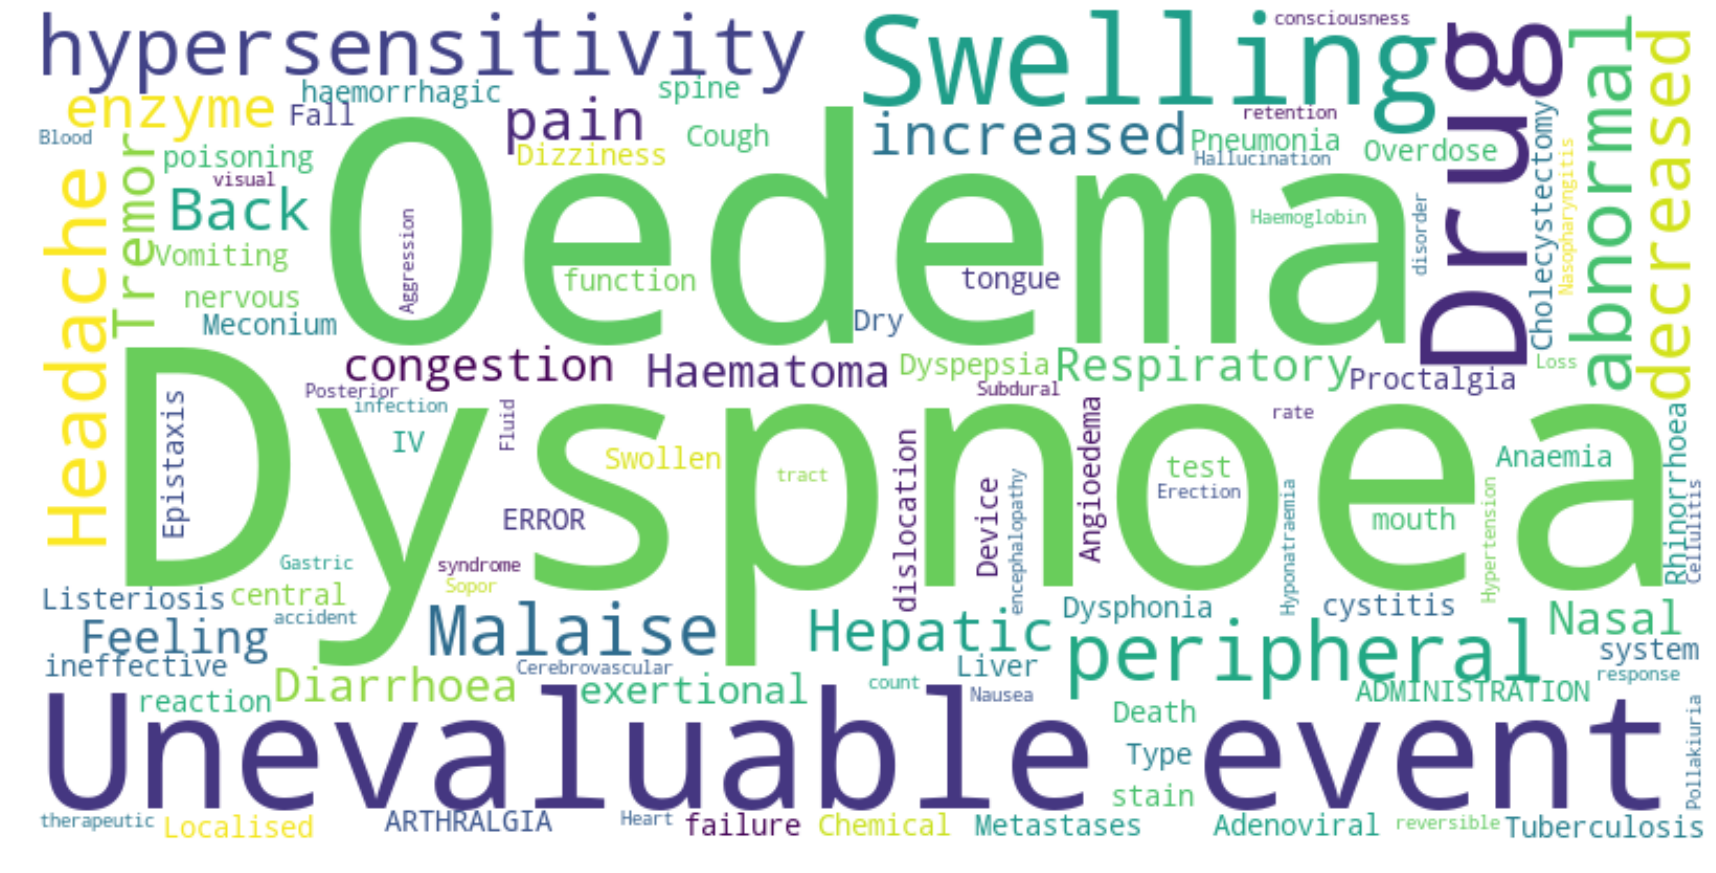

In [10]:

# URL='https://api.fda.gov/drug/event.json?search=receivedate:[20040101+TO+20160601]&count=receivedate'
URL='https://api.fda.gov/drug/event.json?limit=100'
data = requests.get(URL).json()


All_output=data.get('results')
df=pd.DataFrame.from_dict(All_output);
patients=df['patient']
Events_related=[]
for i in range(0,patients.shape[0]):
    Events_related.append(patients[i]['reaction'][0]['reactionmeddrapt'])
    
# Generate all events from the first 100 API requests 
norm_text = ' '.join(Events_related)

wordcloud = WordCloud(background_color = 'white',
                      max_words = 200,
                      width = 800,
                      height = 400).generate(norm_text)

fig, ax = plt.subplots(figsize = (30, 20))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig('./wordcloud.png', dpi = 100, bbox_inches = 'tight')


In [11]:
#And. We’ll start with a look at the JSON data 

filename = ".//dataset//download.json"
with open(filename,'r') as f:
    objects=ijson.items(f,'results.drug.event.partitions')
    partition = list(objects)

In [12]:
url_device_event_0001_0007=partition[0][0]['file']

In [13]:
print('Beginning file download with urllib2 \n ...')


urllib.request.urlretrieve(url_device_event_0001_0007, './/dataset//label-0001-of-0007.json.zip')


Beginning file download with urllib2 
 ...


('.//dataset//label-0001-of-0007.json.zip',
 <http.client.HTTPMessage at 0x28d7e1cb198>)

In [11]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = ".//dataset//label-0001-of-0007.json.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extract('drug-event-0001-of-0004.json',path=".//dataset//")
    print('Done!') 


File Name                                             Modified             Size
drug-event-0001-of-0004.json                   2019-10-31 10:52:52     29031508
Extracting all the files now...
Done!


In [13]:
#Open JSON 
from pandas.io.json import json_normalize
with open('.\\dataset\\drug-event-0001-of-0004.json','rb') as f:
     datastore = json.load(f)


# datastore['results'][0]['companynumb']
# datastore['results'][0]['patient']['patientsex']
# datastore['results'][3]['seriousnessother']
size=len(datastore['results'])
pd_drug_Event=pd.DataFrame.from_dict(datastore['results'][:])
pd_drug_Event.head(12)


#We can also parse the device_event dataset json file and use it and add the concat to create a larger dataset
#device_event=list(ijson.parse(open('.//dataset//device-event-0001-of-0007.json')))

,companynumb,fulfillexpeditecriteria,patient,primarysource,receiptdate,receiptdateformat,receivedate,receivedateformat,receiver,safetyreportid,sender,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,transmissiondate,transmissiondateformat
0,US-SHR-03-007687,2,{'reaction': [{'reactionmeddrapt': 'TORSADE DE...,{'qualification': '1'},20030507,102,20040422,102,None,4347361-X,{'senderorganization': 'FDA-Public Use'},1,NaN,NaN,NaN,NaN,NaN,1,20050107,102
1,200314386,2,{'reaction': [{'reactionmeddrapt': 'DIZZINESS'...,{'qualification': '5'},20031222,102,20040319,102,None,4321919-6,{'senderorganization': 'FDA-Public Use'},2,NaN,NaN,NaN,NaN,NaN,NaN,20041129,102
2,F04200300113,1,{'reaction': [{'reactionmeddrapt': 'ANGINA PEC...,{'qualification': '3'},20030812,102,20040205,102,None,4287485-9,{'senderorganization': 'FDA-Public Use'},1,NaN,NaN,NaN,NaN,1,NaN,20041129,102
3,FR-BRISTOL-MYERS SQUIBB COMPANY-12463170,1,{'reaction': [{'reactionmeddrapt': 'ACUTE MYEL...,{'qualification': '5'},20031211,102,20040209,102,None,4288628-3,{'senderorganization': 'FDA-Public Use'},1,NaN,NaN,NaN,1,1,1,20041129,102
4,2003189045US,2,{'reaction': [{'reactionmeddrapt': 'POST PROCE...,{'qualification': '4'},20031205,102,20040315,102,None,4318307-5,{'senderorganization': 'FDA-Public Use'},2,NaN,NaN,NaN,NaN,NaN,NaN,20041129,102
5,1999-031,2,{'reaction': [{'reactionmeddrapt': 'OESOPHAGIT...,None,19990319,102,20040203,102,None,4289298-0,{'senderorganization': 'FDA-Public Use'},1,NaN,NaN,NaN,NaN,NaN,1,20041129,102
6,200313947,2,{'reaction': [{'reactionmeddrapt': 'EYE IRRITA...,{'qualification': '5'},20031124,102,20040319,102,None,4321916-0,{'senderorganization': 'FDA-Public Use'},2,NaN,NaN,NaN,NaN,NaN,NaN,20041129,102
7,K200300383,2,{'reaction': [{'reactionmeddrapt': 'ANGIONEURO...,{'qualification': '1'},20030307,102,20040324,102,None,4328420-4,{'senderorganization': 'FDA-Public Use'},1,NaN,NaN,NaN,NaN,NaN,1,20041129,102
8,200313762,2,{'reaction': [{'reactionmeddrapt': 'EYE INFLAM...,{'qualification': '5'},20031121,102,20040319,102,None,4321913-5,{'senderorganization': 'FDA-Public Use'},2,NaN,NaN,NaN,NaN,NaN,NaN,20041129,102
9,USA030742263,2,{'reaction': [{'reactionmeddrapt': 'LIMB INJUR...,{'qualification': '1'},20030820,102,20040209,102,None,4290101-3,{'senderorganization': 'FDA-Public Use'},1,NaN,NaN,NaN,1,NaN,1,20041129,102


In [16]:
# Check the number of mising Data per column in percentage 

print(pd_drug_Event.isnull().sum()/pd_drug_Event.shape[0]*100)
print("We are interested in analyzing the Patient informations which is unstructered data inside Drug adverse dataset and containing information about the drug adverse effects")

companynumb                       0.008333
fulfillexpeditecriteria           0.000000
patient                           0.000000
primarysource                    21.541667
receiptdate                       0.000000
receiptdateformat                 0.000000
receivedate                       0.000000
receivedateformat                 0.000000
receiver                        100.000000
safetyreportid                    0.000000
sender                            0.000000
serious                           0.000000
seriousnesscongenitalanomali     99.575000
seriousnessdeath                 91.566667
seriousnessdisabling             96.608333
seriousnesshospitalization       85.258333
seriousnesslifethreatening       97.225000
seriousnessother                 73.191667
transmissiondate                  0.000000
transmissiondateformat            0.000000
dtype: float64
We are interested in analyzing the Patient informations which is unstructered data inside Drug adverse dataset and containing

## PATIENT DATA

In [28]:
# Extract columns from pd_drug_Event['patient']
# 'reaction','patientonsetage', 'patientsex', 'drug', 'patientweight','patientonsetageunit'
# “Normalize” semi-structured JSON data into a flat table
from pandas.io.json import json_normalize
import ast
pd_patient = json_normalize(pd_drug_Event['patient'])
    

In [30]:
# How many recorded patient death dates 
not_null_indices=pd.notnull(pd_patient['patientdeath.patientdeathdate'])
print(" The number patients recorded dead",len(pd_patient[not_null_indices]))

 The number patients recorded dead 9


In [147]:
# Event related 
transform_pd_patient=[ ','.join( repr(e) for e in PATIENT_REACTION_LIST) for PATIENT_REACTION_LIST in pd_patient['reaction']]

transform_pd_patient_1=[ ast.literal_eval(e) for e in transform_pd_patient] 
len_vector=[len(x ) for x in [i for i in transform_pd_patient_1]]
# print([len(x ) for x in [i for i in transform_pd_patient_1]])
Events_related=[]
for i in range(len(transform_pd_patient_1)):
    if(len_vector[i]>1):
        #print(transform_pd_patient_1[i][0])
        Events_related.append([x for x in transform_pd_patient_1[i]])
#Event related per patient
Events_related=pd.DataFrame(Events_related)
# Events_related.columns = ["Event"]
Events_related
# Events_related["Event"].value_counts()


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,{'reactionmeddrapt': 'DIZZINESS'},{'reactionmeddrapt': 'GROWTH OF EYELASHES'},{'reactionmeddrapt': 'INSOMNIA'},{'reactionmeddrapt': 'IRIS HYPERPIGMENTATION'},None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,{'reactionmeddrapt': 'ANGINA PECTORIS'},{'reactionmeddrapt': 'DYSPNOEA'},{'reactionmeddrapt': 'MYOCARDIAL ISCHAEMIA'},None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,{'reactionmeddrapt': 'ACUTE MYELOID LEUKAEMIA'},{'reactionmeddrapt': 'BONE MARROW DEPRESSION'},{'reactionmeddrapt': 'LEUKAEMIA'},{'reactionmeddrapt': 'METABOLIC ACIDOSIS'},{'reactionmeddrapt': 'NEUROPATHY PERIPHERAL'},{'reactionmeddrapt': 'RENAL FAILURE ACUTE'},None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,{'reactionmeddrapt': 'POST PROCEDURAL HAEMORRH...,{'reactionmeddrapt': 'SKIN DISCOLOURATION'},{'reactionmeddrapt': 'SKIN SWELLING'},None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,{'reactionmeddrapt': 'EYE IRRITATION'},{'reactionmeddrapt': 'EYE REDNESS'},None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,{'reactionmeddrapt': 'ANGIONEUROTIC OEDEMA'},{'reactionmeddrapt': 'OROPHARYNGEAL SWELLING'},{'reactionmeddrapt': 'TONGUE OEDEMA'},None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,{'reactionmeddrapt': 'LIMB INJURY'},{'reactionmeddrapt': 'THROMBOSIS'},None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,{'reactionmeddrapt': 'BLINDNESS TRANSIENT'},{'reactionmeddrapt': 'CEREBROVASCULAR ACCIDENT'},None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,{'reactionmeddrapt': 'HYPERSENSITIVITY'},{'reactionmeddrapt': 'SWELLING'},None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,{'reactionmeddrapt': 'LOSS OF CONSCIOUSNESS'},{'reactionmeddrapt': 'BALANCE DISORDER'},{'reactionmeddrapt': 'MALARIA'},{'reactionmeddrapt': 'DYSPNOEA'},{'reactionmeddrapt': 'EAR PAIN'},{'reactionmeddrapt': 'PENILE ULCERATION'},{'reactionmeddrapt': 'BLADDER PAIN'},{'reactionmeddrapt': 'HERPES DERMATITIS'},{'reactionmeddrapt': 'MASS'},{'reactionmeddrapt': 'FLATULENCE'},...,{'reactionmeddrapt': 'DYSPHAGIA'},{'reactionmeddrapt': 'VESTIBULAR DISORDER'},{'reactionmeddrapt': 'ABSCESS LIMB'},{'reactionmeddrapt': 'TENDON PAIN'},{'reactionmeddrapt': 'HALO VISION'},{'reactionmeddrapt': 'NEUTROPHIL COUNT DECREAS...,{'reactionmeddrapt': 'NAUSEA'},{'reactionmeddrapt': 'PARAESTHESIA'},{'reactionmeddrapt': 'AMNESIA'},{'reactionmeddrapt': 'GASTROINTESTINAL DISORDER'}


In [193]:
# Plots
def isNaN(num):
    return num != num
Events_related.fillna(value=pd.np.nan, inplace=True)
Event_freq=[]
for i in range(0,Events_related.shape[0]):
    for j in range(0,Events_related.shape[1]):
        if(  not isNaN(Events_related.iloc[i, j]) ):
            s=Events_related.iloc[i, j]
            Event_freq.append(s['reactionmeddrapt'])


In [229]:
# Plot histogram using matplotlib bar().
Event_freq=pd.DataFrame(Event_freq)
Event_freq_counts=Event_freq.iloc[:,0].value_counts()
Event_freq_counts[0:10]

NAUSEA              477
DRUG INEFFECTIVE    345
FATIGUE             319
HEADACHE            319
DIZZINESS           287
VOMITING            272
DYSPNOEA            258
INSOMNIA            202
PREGNANCY           197
DEPRESSION          194
Name: 0, dtype: int64

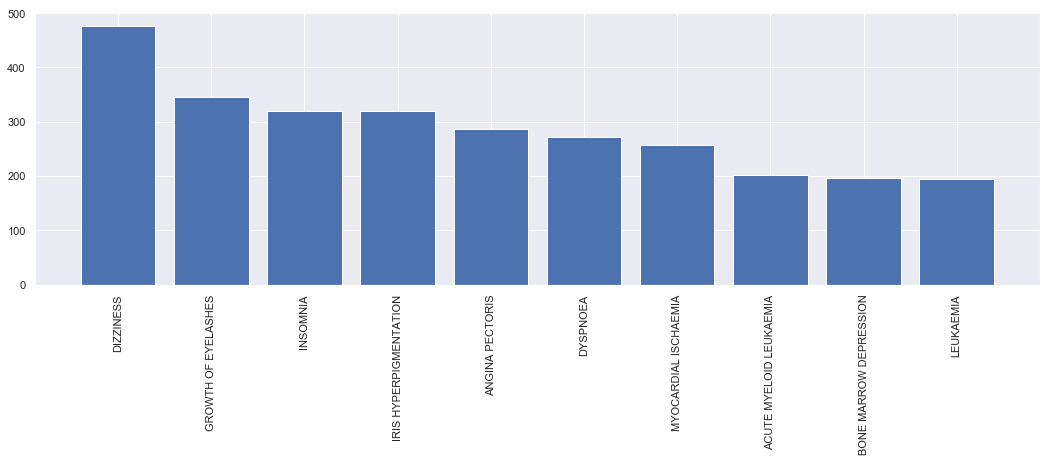

In [244]:
# Plot Event frequency as bar graph. 
ind=(Event_freq.iloc[:,0]).unique()
ind=ind[0:10]
f, ax = plt.subplots(figsize=(18,5))
plt.bar(ind, Event_freq_counts[0:10],align='center')
plt.xticks(rotation='vertical')
plt.show()


In [253]:
# EDA  for seriousness? How many levels of serious we have? 
from pandas.api.types import CategoricalDtype
not_null_indices=pd.notnull(pd_drug_Event['serious']) 
pd_drug_Event=pd_drug_Event[not_null_indices]
print("We have ",len(pd_drug_Event['serious']))
print("serious case to look into")

We have  12000
serious case to look into
